# Twitter Classification Of Nepal Earthquake Tweets

## Introduction
Microblogging sites like Twitter are increasingly being used for aiding relief operations during various mass emergencies.  A lot of critical situational information is posted on microblogging sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity  and resource availability. Hence, automated Machine Learning  techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

### Prerequisites
We would highly recommend that before the hack night you have some kind of toolchain and development environment already installed and ready. If you have no idea where to start with this, try a combination like:<br>
Python<br>
scikit-learn / sklearn<br>
Pandas<br>
NumPy<br>
matplotlib<br>
An environment to work in - something like Jupyter or Spyder<br>


### Dataset:
The dataset is in the form of a txt file:<br>
https://drive.google.com/file/d/18c33mwHSkcukt5UiB9TMphCQBzyIokCI/view?usp=sharing/
<br>The text file contains tuples in the form:<br>
(target class,Tweet id,Tweet’s text)

### Class Description:
0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)<br>
1:The tweet mentions a resource that is needed (Need Tweets)<br>
2:The tweet mentions a resource that is available(Availability tweets)

## 1. Data Understanding and Exploration

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = open("Train.txt","r",encoding='UTF-8')
df = pd.DataFrame(file.readlines())
file.close()
df.head()

,0
0,"(0, '591764470197723137', '#Nepal #news Adding..."
1,"(0, '591779538046218240', ""The massacre of peo..."
2,"(0, '591728244925210624', ""I'm lonely, maybe y..."
3,"(0, '591774433926193152', '#nepal #news 6 bill..."
4,"(0, '591764472651386882', '#Nepal #news Indian..."


In [3]:
for c in df:
    df[c] =df[c].astype(str).str.replace("(","").str.replace(")","")

In [4]:
df = df[0].str.split(',', expand=True)
df.head()

,0,1,2,3,4,5,6,7,8
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...,None,None,None,None,None,None
1,0,'591779538046218240',"""The massacre of people's movement says peace...",None,None,None,None,None,None
2,0,'591728244925210624',"""I'm lonely",maybe you're going to die without closing the...,"I'm going to die.""\n",None,None,None,None
3,0,'591774433926193152','#nepal #news 6 billion collection collection...,None,None,None,None,None,None
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...,None,None,None,None,None,None


Now we need to add data of all the 7 columns to get our whole tweet text

In [5]:
df = df.fillna(value=" ")
df["texts"] = df[2].map(str)+df[3].map(str)+df[4].map(str)+df[5].map(str)+df[6].map(str)+df[7].map(str)+df[8].map(str)
df = df.drop(columns=[2,3,4,5,6,7,8],axis = 1)
df.head()

,0,1,texts
0,0,'591764470197723137','#Nepal #news Adding to Bhutanese Refugees Bh...
1,0,'591779538046218240',"""The massacre of people's movement says peace..."
2,0,'591728244925210624',"""I'm lonely maybe you're going to die without..."
3,0,'591774433926193152','#nepal #news 6 billion collection collection...
4,0,'591764472651386882','#Nepal #news Indian proposal to crash airpor...


In [6]:
df.columns = ['TweetClass','TweetId','Tweet']

In [7]:
print(df.shape)
print(df.columns)

(18233, 3)
Index(['TweetClass', 'TweetId', 'Tweet'], dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null object
TweetId       18233 non-null object
Tweet         18233 non-null object
dtypes: object(3)
memory usage: 213.7+ KB


In [9]:
df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

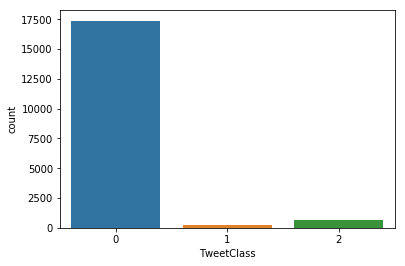

In [10]:
sns.countplot(x='TweetClass', data=df)

### Mean Of Tweet Character Per Tweet

In [11]:
mean_df = (df.groupby('TweetClass')['Tweet'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(mean_df)

  TweetClass  mean_characters_per_tweet
0          0                 101.570006
1          1                 108.924623
2          2                 112.713855


In [12]:
irrelevant_df = df[df['TweetClass'] == '0']

need_df = df[df['TweetClass'] == '1'] 

available_df = df[df['TweetClass'] == '2']

print("Irrelevent: ",irrelevant_df.shape)
print("Needs: ",need_df.shape)
print("Available: ",available_df.shape)

Irrelevent:  (17370, 3)
Needs:  (199, 3)
Available:  (664, 3)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vect_irrelevant = CountVectorizer(stop_words='english')

vect_need = CountVectorizer(stop_words='english')

vect_available = CountVectorizer(stop_words='english')

irrelevant_data = vect_irrelevant.fit_transform(irrelevant_df['Tweet'])
need_data = vect_need.fit_transform(need_df['Tweet'])
available_data = vect_available.fit_transform(available_df['Tweet'])

In [14]:
irrelevant_word = vect_irrelevant.get_feature_names()
irrelevant_freqs = irrelevant_data.sum(axis=0).A1
irrelevant_result = dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16272


In [15]:
need_word = vect_need.get_feature_names()
need_freqs = need_data.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

755


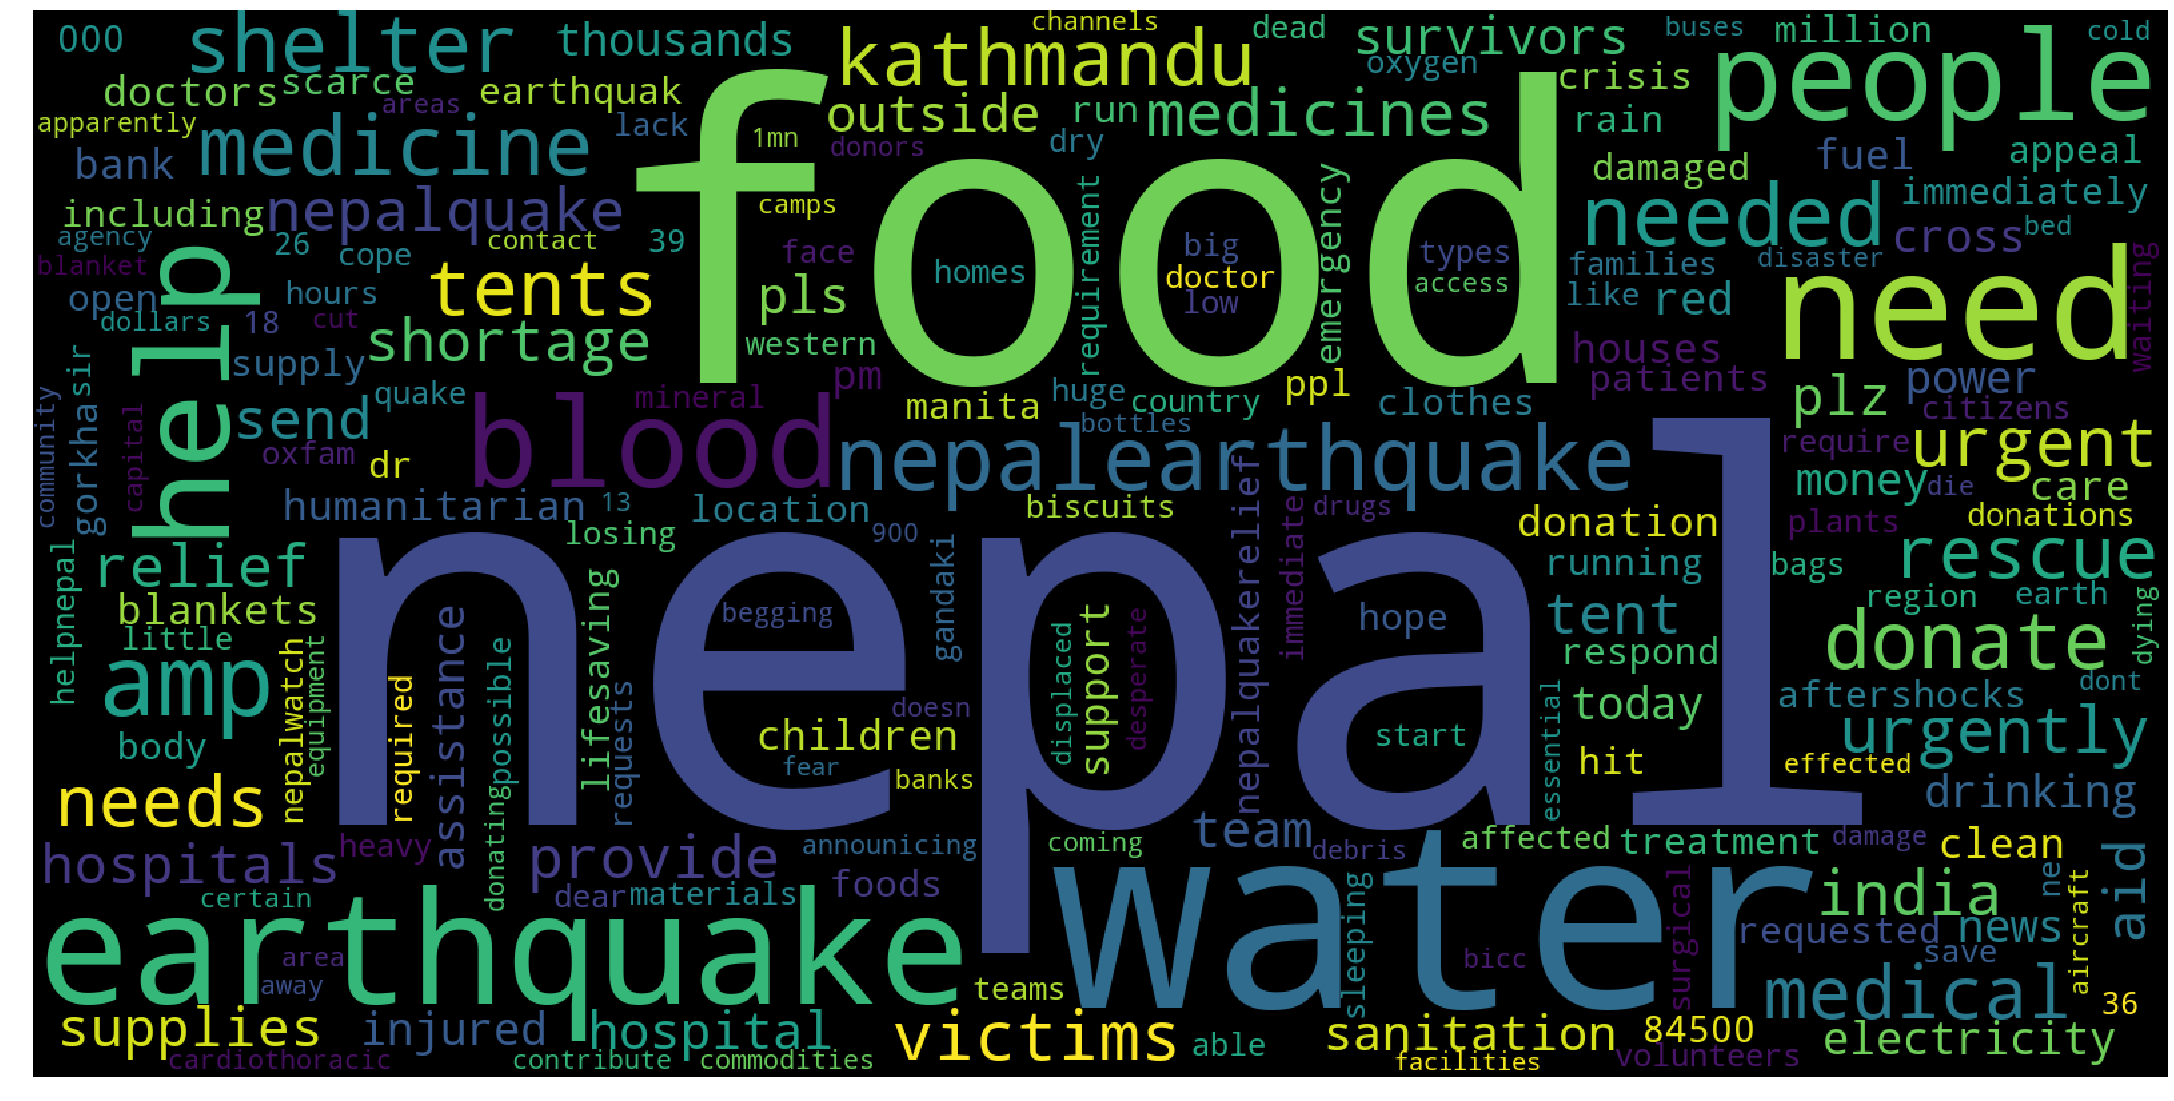

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black',
                        width=1600,
                        height=800,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("need_word_cloud.png")
plt.show()

In [17]:
available_word = vect_available.get_feature_names()
available_freqs = available_data.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

1579


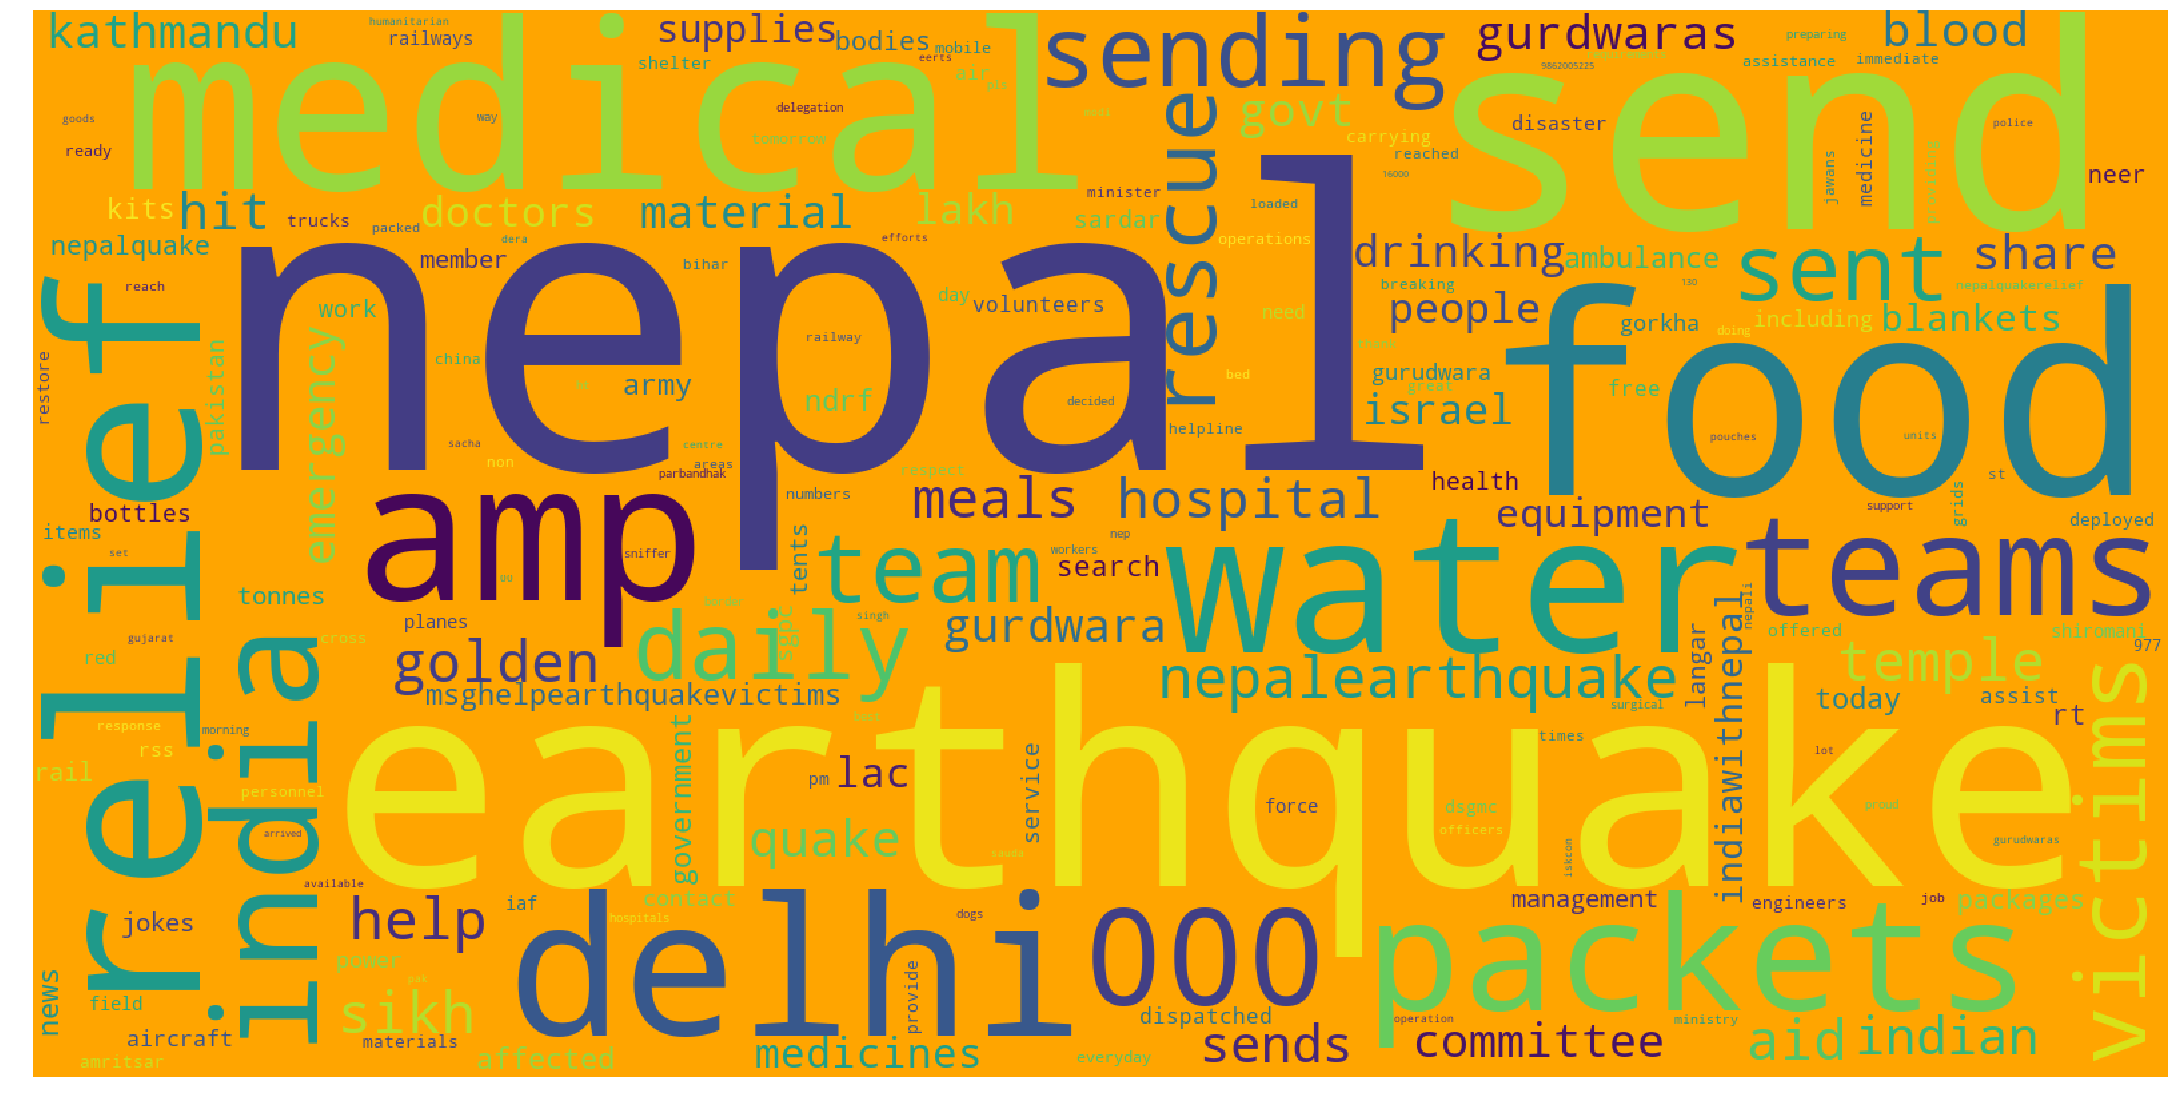

In [18]:
wordcloud = WordCloud(background_color='orange',
                        width=1600,
                        height=800,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("available_word_cloud.png")
plt.show()

In [19]:
X = df['Tweet']
Y = df['TweetClass']

### Using StratifiedShuffleSplit to Split Data

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
s = StratifiedShuffleSplit(test_size=0.2, random_state=0)
s.get_n_splits(X, Y)
for index1, index2 in s.split(X, Y):
    x_train, x_test = X[index1], X[index2]
    y_train, y_test = Y[index1], Y[index2]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_train=TfidfVectorizer(lowercase=True)
x_train=vectorizer_train.fit_transform(x_train.values)
x_test=vectorizer_train.transform(x_test.values)

# 4. Model Building And Evaluation

<h3><b>Following Models are trained on the given data</b></h3>
<ol>
    <li>LogisticRegression</li>
    <li>KNN (K Nearest Neighbor)</li>
    <li>SVM (Support Vector Machine) With LinearRBF Kernel</li>
    <li>Naive Bayes</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
</ol>

## Linear Regression

In [22]:
from sklearn.linear_model import LogisticRegression

Regressor1 = LogisticRegression()
Regressor1.fit(x_train,y_train)

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
y_pred1 = Regressor1.predict(x_test)
from sklearn.metrics import confusion_matrix , f1_score
score1=f1_score(y_test,y_pred1, average='weighted')
print("F1 Score: ",score1)
print(confusion_matrix(y_test,y_pred1))

F1 Score:  0.9584901681889754
[[3465    0    9]
 [  33    4    3]
 [  77    1   55]]


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Regressor2 = KNeighborsClassifier()
Regressor2.fit(x_train,y_train)
y_pred2 = Regressor2.predict(x_test)

In [25]:
score2 = f1_score(y_test,y_pred2, average='weighted')
print("F1 Score: ",score2)
print(confusion_matrix(y_test,y_pred2))

F1 Score:  0.95106912999916
[[3472    0    2]
 [  40    0    0]
 [  93    0   40]]


c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM (RBF Kernel)

In [27]:
from sklearn.svm import SVC
Regressor4 = SVC(kernel='rbf')
Regressor4.fit(x_train,y_train)
y_pred4 = Regressor4.predict(x_test)
score4 = f1_score(y_test,y_pred4, average='weighted')
print("F1 Score: ",score4)
print(confusion_matrix(y_test,y_pred4))

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


F1 Score:  0.9294218427389732
[[3474    0    0]
 [  40    0    0]
 [ 133    0    0]]


c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
Regressor5 = MultinomialNB()
Regressor5.fit(x_train,y_train)
y_pred5 = Regressor5.predict(x_test)
score5 = f1_score(y_test,y_pred5, average='weighted')
print("F1 Score: ",score5)
print(confusion_matrix(y_test,y_pred5))

F1 Score:  0.9327175261181827
[[3474    0    0]
 [  40    0    0]
 [ 128    0    5]]


c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

Regressor6 = DecisionTreeClassifier(criterion='gini')
Regressor6.fit(x_train,y_train)
y_pred6 = Regressor6.predict(x_test)
score6 = f1_score(y_test,y_pred6, average='weighted')
print("F1 Score: ",score6)
print(confusion_matrix(y_test,y_pred6))


F1 Score:  0.9594709607556712
[[3395   19   60]
 [  22   13    5]
 [  41    3   89]]


## Random Forest


In [30]:
from sklearn.ensemble import RandomForestClassifier

Regressor7 = RandomForestClassifier(criterion='gini')
Regressor7.fit(x_train,y_train)
y_pred7 = Regressor7.predict(x_test)
score7 = f1_score(y_test,y_pred7, average='weighted')
print("F1 Score: ",score7,end="\n\n")
print(confusion_matrix(y_test,y_pred7))

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 Score:  0.9580841427055755

[[3465    0    9]
 [  35    2    3]
 [  75    1   57]]


In [31]:
score = [score1,score2,score4,score5,score6,score7]

df = {'Score' : score,
      'Algo' : ['Logistic Regression','KNN','SVM RBF',"Naive Bayes","Decision Tree",
                       'Random Forest']}

Accuracy =pd.DataFrame(df)
Accuracy

,Score,Algo
0,0.958490,Logistic Regression
1,0.951069,KNN
2,0.929422,SVM RBF
3,0.932718,Naive Bayes
4,0.959471,Decision Tree
5,0.958084,Random Forest


#### Descision tree is the model with best accuracy